# Importing necessary libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import xgboost as xgb

# Importing the dataset

In [51]:
# Load the dataset
data = pd.read_csv('C:/Users/user/Desktop/World Bank Group Health Data in Developing countries/Data/API_8_DS2_en_csv_v2_1694.csv', delimiter=',', skiprows=4)


In [52]:
data.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,Completeness of death registration with cause-...,SP.REG.DTHS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,Completeness of birth registration (%),SP.REG.BRTH.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Completeness of birth registration, urban (%)",SP.REG.BRTH.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Completeness of birth registration, rural (%)",SP.REG.BRTH.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Aruba,ABW,"Completeness of birth registration, male (%)",SP.REG.BRTH.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Completeness of birth registration, female (%)",SP.REG.BRTH.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.151524,49.166052,49.169034,49.169313,49.174751,49.173397,...,47.434347,47.379401,47.326208,47.268679,47.203855,47.155493,47.168040,47.207326,47.230380,NaN
8,Aruba,ABW,"Population, male",SP.POP.TOTL.MA.IN,26995.000000,27326.000000,27692.000000,28027.000000,28334.000000,28614.000000,...,51185.000000,51514.000000,51460.000000,51479.000000,51548.000000,51205.000000,50800.000000,50658.000000,50706.000000,NaN
9,Aruba,ABW,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,50.848476,50.833948,50.830966,50.830687,50.825249,50.826603,...,52.565653,52.620599,52.673792,52.731321,52.796145,52.844507,52.831960,52.792674,52.769620,NaN


# Exploratory Data Analysis

* Replacing Nan with 0

In [53]:
data = data.fillna(0)

In [54]:
data.head(20)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,Aruba,ABW,Completeness of death registration with cause-...,SP.REG.DTHS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,Aruba,ABW,Completeness of birth registration (%),SP.REG.BRTH.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,Aruba,ABW,"Completeness of birth registration, urban (%)",SP.REG.BRTH.UR.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,Aruba,ABW,"Completeness of birth registration, rural (%)",SP.REG.BRTH.RU.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,Aruba,ABW,"Completeness of birth registration, male (%)",SP.REG.BRTH.MA.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,Aruba,ABW,"Completeness of birth registration, female (%)",SP.REG.BRTH.FE.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,Aruba,ABW,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.151524,49.166052,49.169034,49.169313,49.174751,49.173397,...,47.434347,47.379401,47.326208,47.268679,47.203855,47.155493,47.168040,47.207326,47.230380,0.0
8,Aruba,ABW,"Population, male",SP.POP.TOTL.MA.IN,26995.000000,27326.000000,27692.000000,28027.000000,28334.000000,28614.000000,...,51185.000000,51514.000000,51460.000000,51479.000000,51548.000000,51205.000000,50800.000000,50658.000000,50706.000000,0.0
9,Aruba,ABW,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,50.848476,50.833948,50.830966,50.830687,50.825249,50.826603,...,52.565653,52.620599,52.673792,52.731321,52.796145,52.844507,52.831960,52.792674,52.769620,0.0


* Shape of the data

In [55]:
data.shape


(67564, 69)

* Data columns

In [56]:
data.columns


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

* Data types

In [57]:
data.dtypes


Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2020              float64
2021              float64
2022              float64
2023              float64
Unnamed: 68       float64
Length: 69, dtype: object

* Summary Statistics

In [58]:
data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
count,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,...,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,6.756400e+04,67564.0
mean,1.814436e+06,1.829709e+06,1.863494e+06,1.905258e+06,1.947319e+06,2.000190e+06,2.034558e+06,2.079282e+06,2.124979e+06,2.172306e+06,...,4.753936e+06,4.784306e+06,4.845720e+06,4.904759e+06,4.962373e+06,5.019037e+06,5.068510e+06,5.120318e+06,5.170409e+06,0.0
std,3.530629e+07,3.574453e+07,3.638840e+07,3.721396e+07,3.804612e+07,3.889524e+07,3.978544e+07,4.068116e+07,4.160252e+07,4.255752e+07,...,9.266976e+07,9.372910e+07,9.479183e+07,9.582075e+07,9.682406e+07,9.779561e+07,9.866116e+07,9.950745e+07,1.003827e+08,0.0
min,-4.757050e+05,-3.989460e+05,-7.034640e+05,-6.008510e+05,-1.858822e+06,-1.069758e+06,-1.039366e+06,-1.248193e+06,-1.288030e+06,-1.472959e+06,...,-6.323231e+06,-5.291990e+06,-5.100703e+06,-5.097600e+06,-4.539143e+06,-2.085062e+06,-2.708744e+06,-1.010303e+07,-4.970043e+06,0.0
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.748396e+00,3.500000e+00,3.497839e+00,4.027927e+00,4.989995e+00,1.754324e+00,5.891318e-01,0.000000e+00,0.000000e+00,0.0
75%,3.163866e+00,2.968874e+00,2.980677e+00,3.003803e+00,3.052800e+00,3.268037e+00,3.102093e+00,3.141958e+00,3.189830e+00,3.250721e+00,...,4.090000e+01,3.530000e+01,3.600000e+01,3.649212e+01,4.240000e+01,3.050065e+01,2.521675e+01,1.170000e+01,1.639774e+00,0.0
max,3.021529e+09,3.062769e+09,3.117373e+09,3.184063e+09,3.251253e+09,3.318998e+09,3.389087e+09,3.459014e+09,3.530702e+09,3.604812e+09,...,7.441472e+09,7.528523e+09,7.614114e+09,7.696495e+09,7.776892e+09,7.856139e+09,7.921184e+09,7.989982e+09,8.061876e+09,0.0


* Dropping the 'Unnamed: 68' column

In [59]:
data = data.drop(columns=['Unnamed: 68'])

# Visualizations

* Aruba
* Indicators: Population, Life expectancy at birth and Fertility

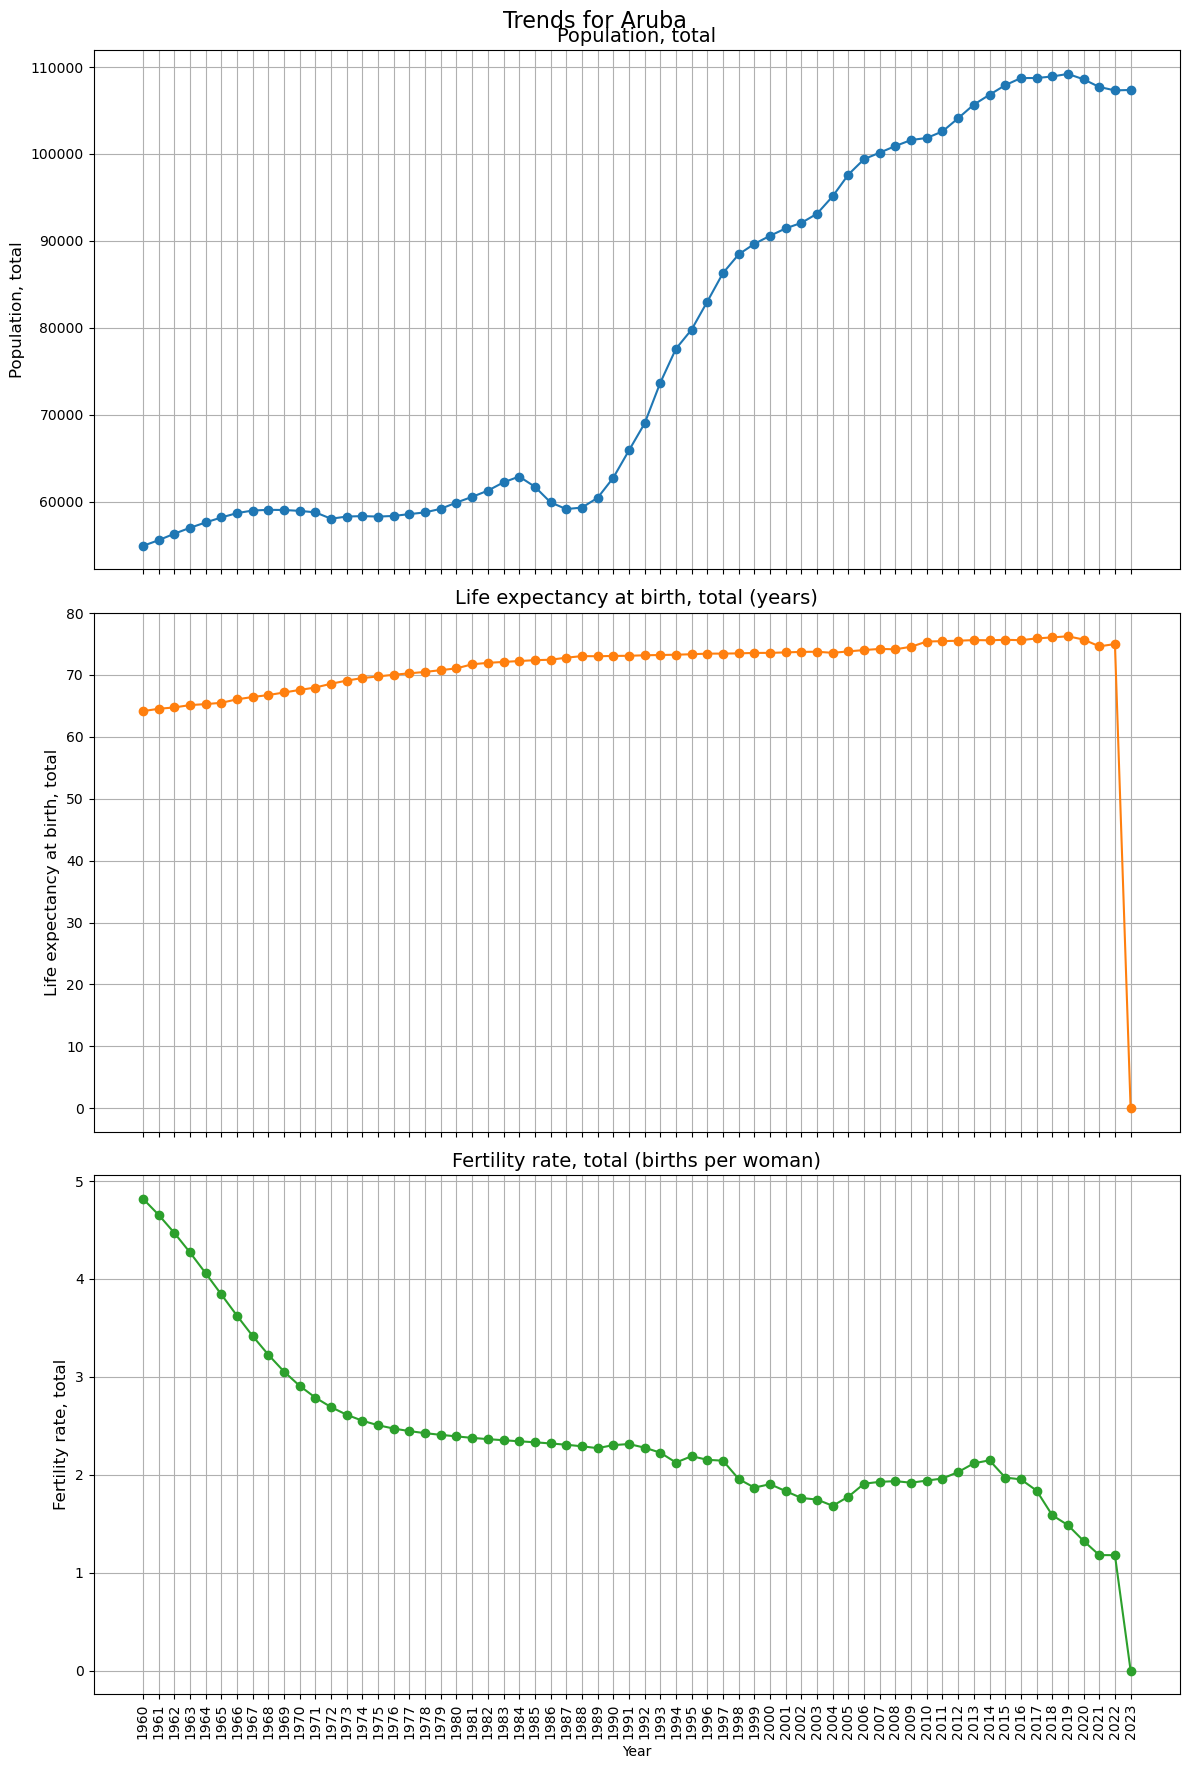

In [60]:
country = 'Aruba'
country_data = data[data['Country Name'] == country]
indicators = ['Population, total', 'Life expectancy at birth, total (years)', 'Fertility rate, total (births per woman)']
country_data = country_data[country_data['Indicator Name'].isin(indicators)]

country_data = country_data.drop(columns=['Country Name', 'Country Code', 'Indicator Code'])

country_data = country_data.set_index('Indicator Name').transpose()

fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

for i, indicator in enumerate(indicators):
    axes[i].plot(country_data.index, country_data[indicator], marker='o', color=sns.color_palette('tab10')[i])
    axes[i].set_title(indicator, fontsize=14)
    axes[i].set_ylabel(indicator.split('(')[0].strip(), fontsize=12)
    axes[i].grid()

plt.suptitle(f"Trends for {country}", fontsize=16)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Visualization of population for the following countries
* Aruba
* Afghanistan
* Albania
* Angola
* Argentina

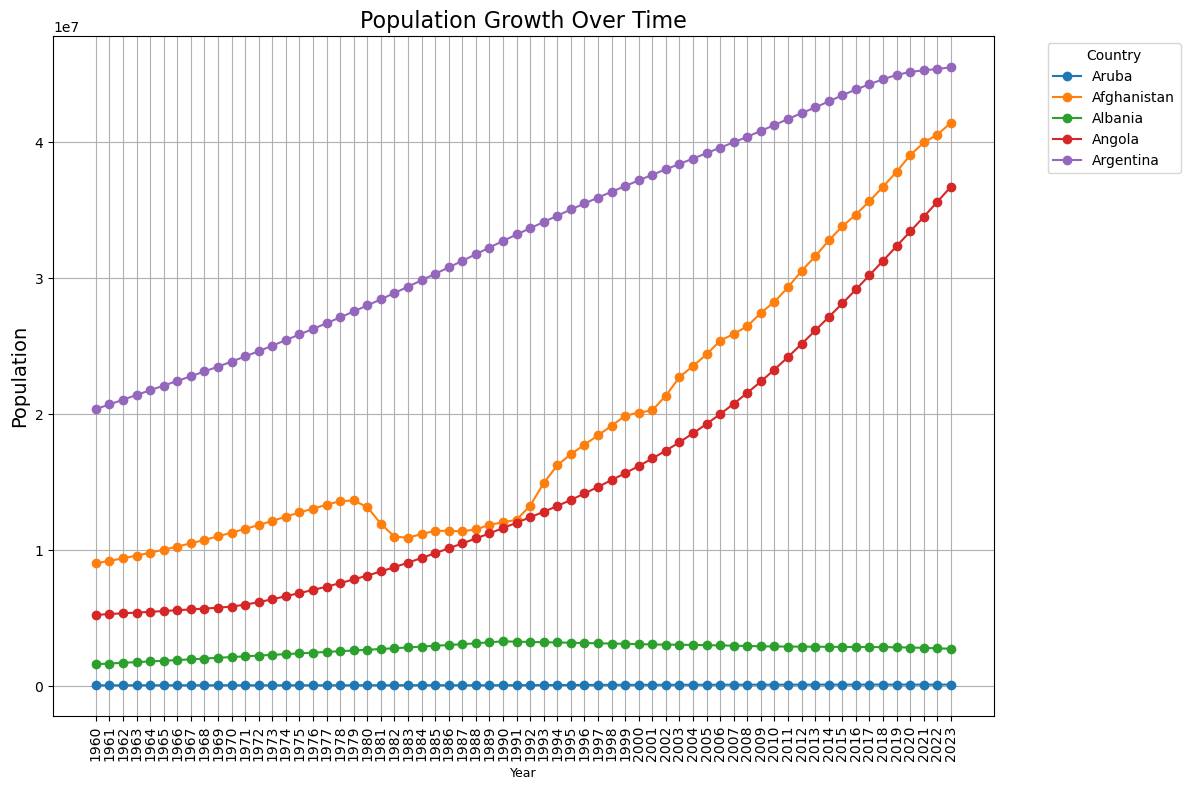

In [61]:
population_data = data[data['Indicator Name'] == 'Population, total']

countries = ['Aruba', 'Afghanistan', 'Albania', 'Angola', 'Argentina']
population_data = population_data[population_data['Country Name'].isin(countries)]

population_data = population_data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

population_data = population_data.set_index('Country Name').transpose()

plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(population_data.index, population_data[country], marker='o', label=country)

plt.title("Population Growth Over Time", fontsize=16)
plt.xlabel("Year", fontsize=9)
plt.ylabel("Population", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Visualization of Life Expectancy for the following countries
* Aruba
* Afghanistan
* Albania
* Angola
* Argentina

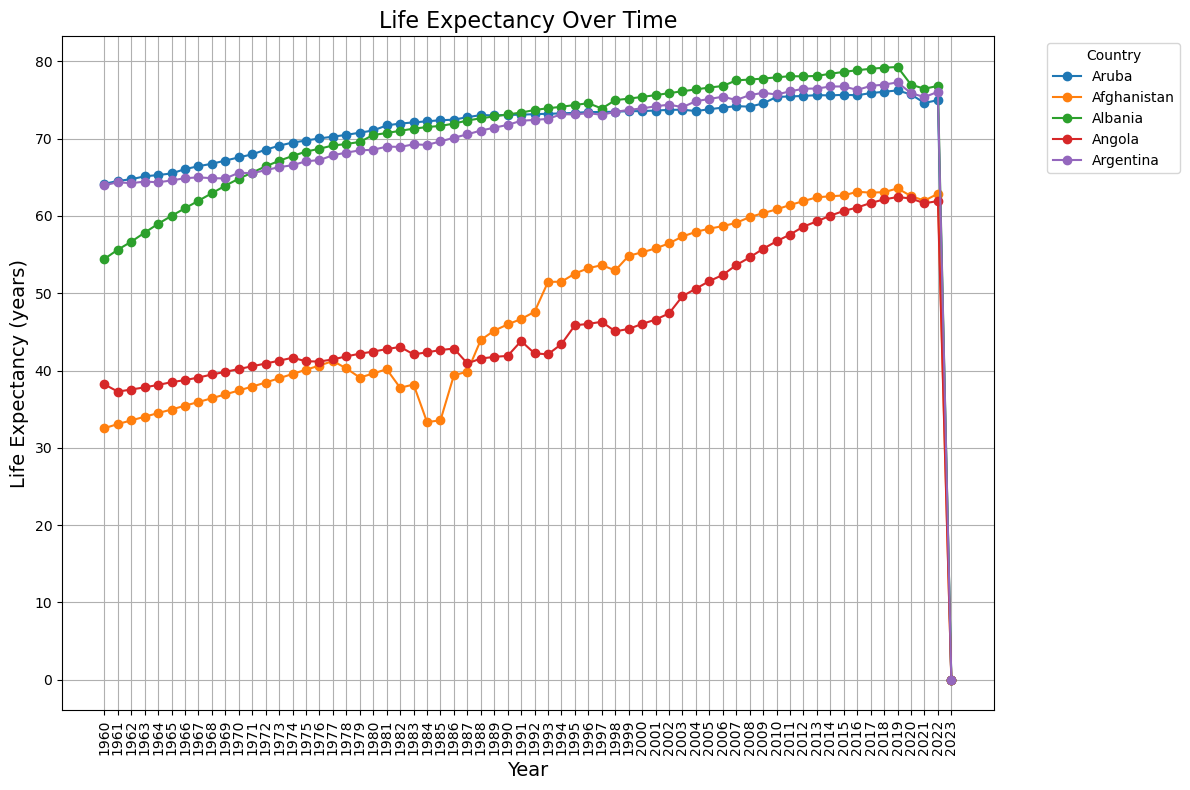

In [62]:
life_expectancy_data = data[data['Indicator Name'] == 'Life expectancy at birth, total (years)']

countries = ['Aruba', 'Afghanistan', 'Albania', 'Angola', 'Argentina']
life_expectancy_data = life_expectancy_data[life_expectancy_data['Country Name'].isin(countries)]

life_expectancy_data = life_expectancy_data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

life_expectancy_data = life_expectancy_data.set_index('Country Name').transpose()

plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(life_expectancy_data.index, life_expectancy_data[country], marker='o', label=country)

plt.title("Life Expectancy Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Life Expectancy (years)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Visualization of Fertility rate for the following countries
* Aruba
* Afghanistan
* Albania
* Angola
* Argentina

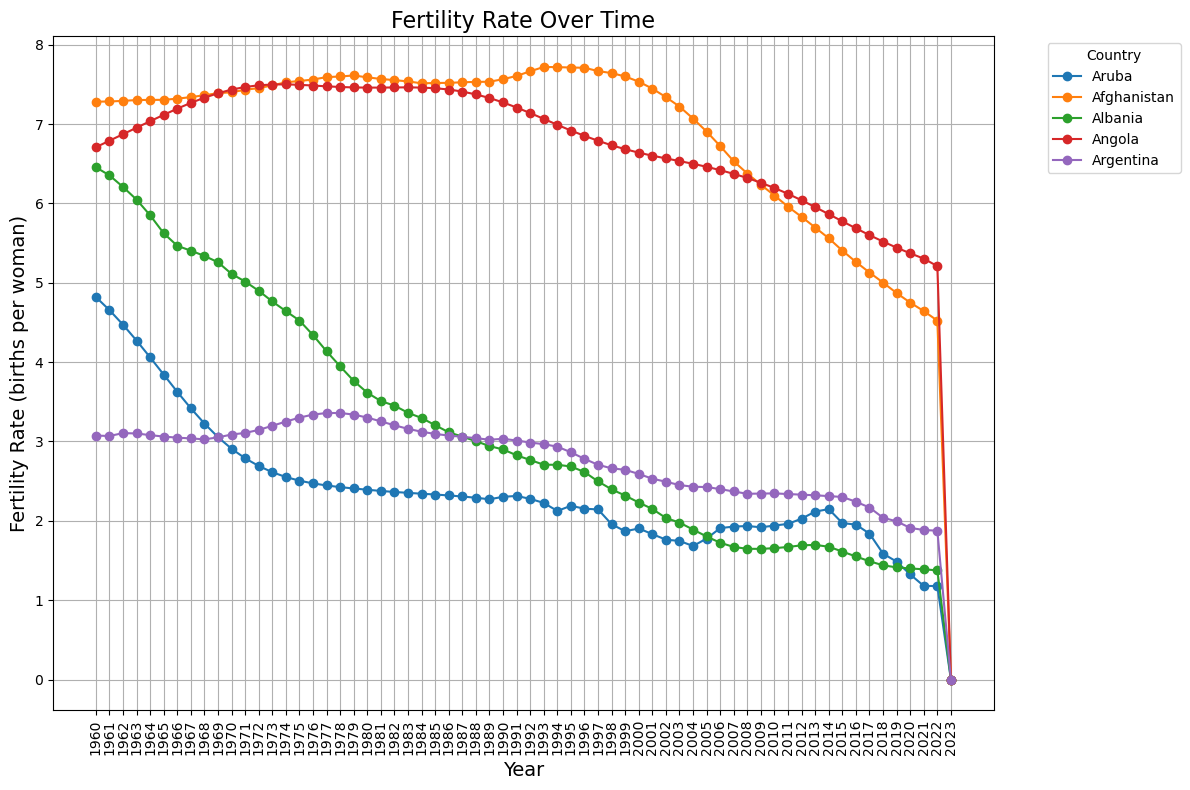

In [63]:
fertility_data = data[data['Indicator Name'] == 'Fertility rate, total (births per woman)']

countries = ['Aruba', 'Afghanistan', 'Albania', 'Angola', 'Argentina']
fertility_data = fertility_data[fertility_data['Country Name'].isin(countries)]

fertility_data = fertility_data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

fertility_data = fertility_data.set_index('Country Name').transpose()

plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(fertility_data.index, fertility_data[country], marker='o', label=country)

plt.title("Fertility Rate Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Fertility Rate (births per woman)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Looking at Nigeria and Subsaharan Africa. 


##### Creating time-series visualizations for Nigeria and a few other Sub-Saharan African countries (e.g., South Africa, Kenya, Ghana, Ethiopia) for key indicators like Population, Life Expectancy, and Fertility Rate.

* Population Growth Over Time

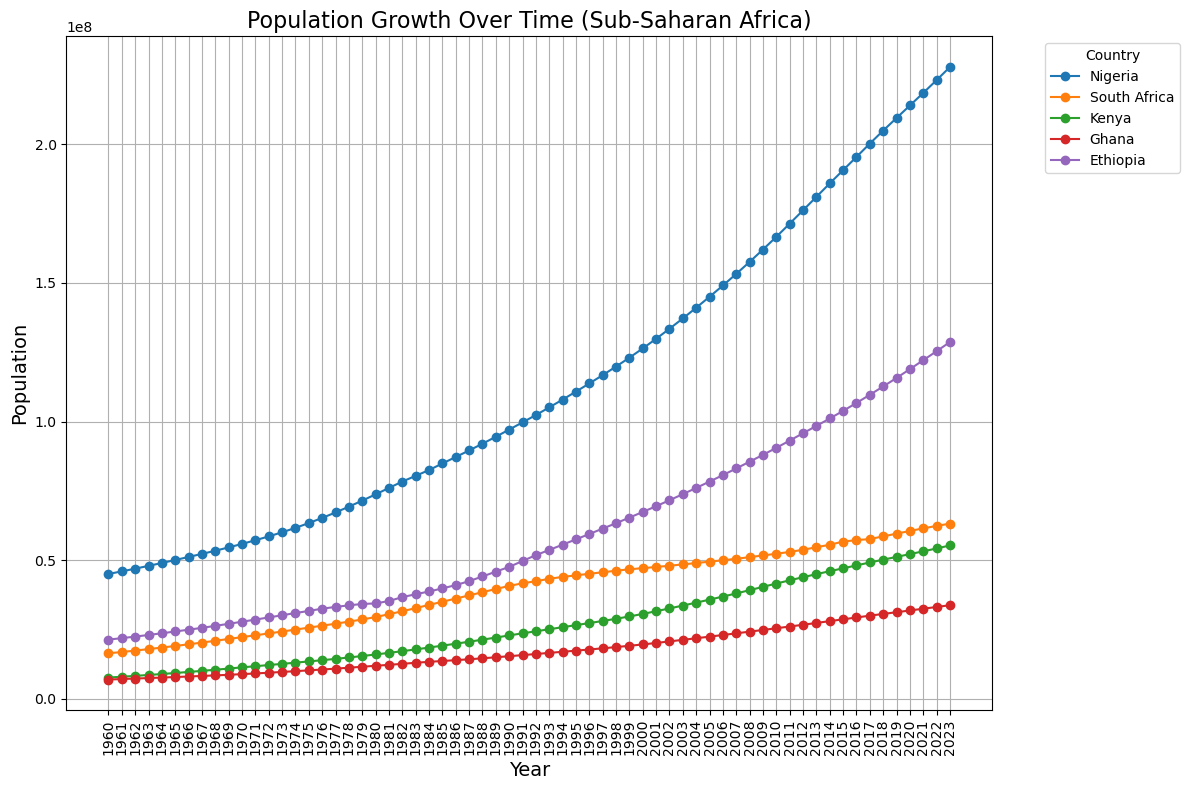

In [64]:
population_data = data[data['Indicator Name'] == 'Population, total']

countries = ['Nigeria', 'South Africa', 'Kenya', 'Ghana', 'Ethiopia']
population_data = population_data[population_data['Country Name'].isin(countries)]

population_data = population_data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

population_data = population_data.set_index('Country Name').transpose()

plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(population_data.index, population_data[country], marker='o', label=country)

plt.title("Population Growth Over Time (Sub-Saharan Africa)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* Life Expectancy Over Time

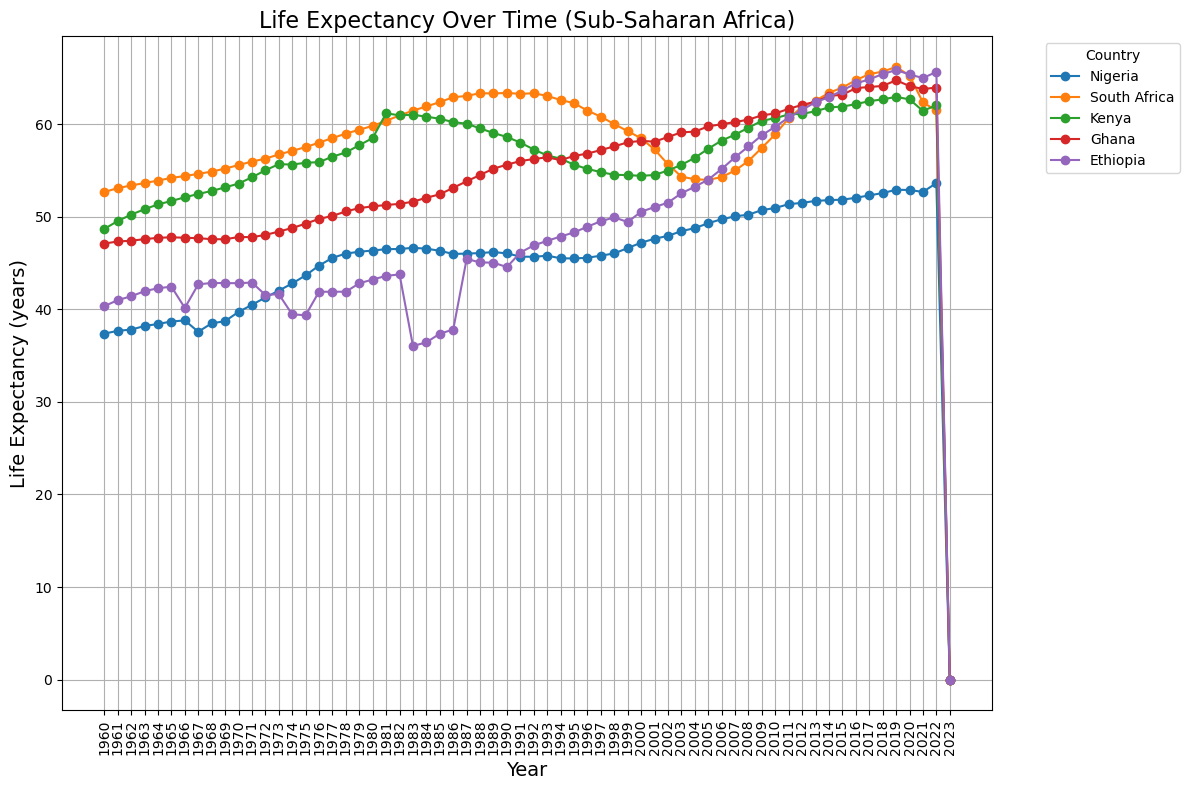

In [65]:
life_expectancy_data = data[data['Indicator Name'] == 'Life expectancy at birth, total (years)']

life_expectancy_data = life_expectancy_data[life_expectancy_data['Country Name'].isin(countries)]

life_expectancy_data = life_expectancy_data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

life_expectancy_data = life_expectancy_data.set_index('Country Name').transpose()

plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(life_expectancy_data.index, life_expectancy_data[country], marker='o', label=country)

plt.title("Life Expectancy Over Time (Sub-Saharan Africa)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Life Expectancy (years)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* Fertility Rate Over Time

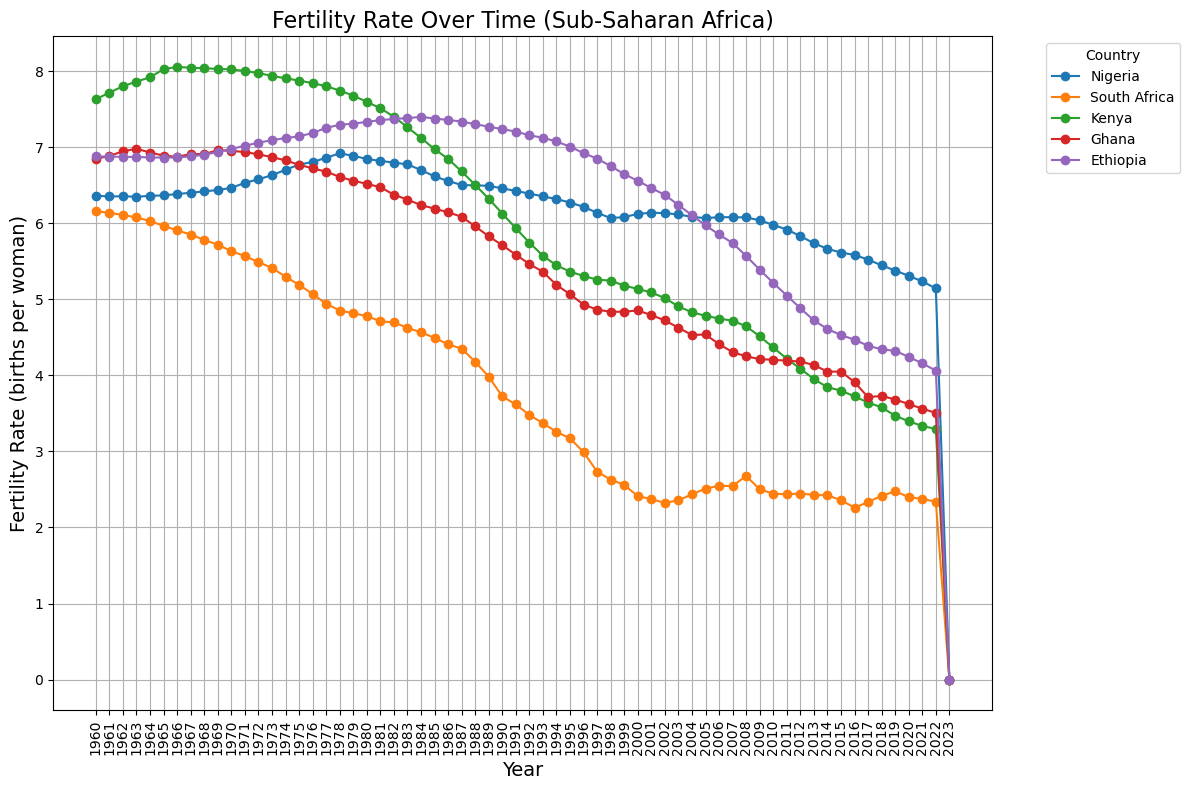

In [66]:
fertility_data = data[data['Indicator Name'] == 'Fertility rate, total (births per woman)']

fertility_data = fertility_data[fertility_data['Country Name'].isin(countries)]
fertility_data = fertility_data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
fertility_data = fertility_data.set_index('Country Name').transpose()

plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(fertility_data.index, fertility_data[country], marker='o', label=country)

plt.title("Fertility Rate Over Time (Sub-Saharan Africa)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Fertility Rate (births per woman)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Nigeria Subplots for the indicators:
* Population
* Life Expectancy at birth and
* Fertility rate

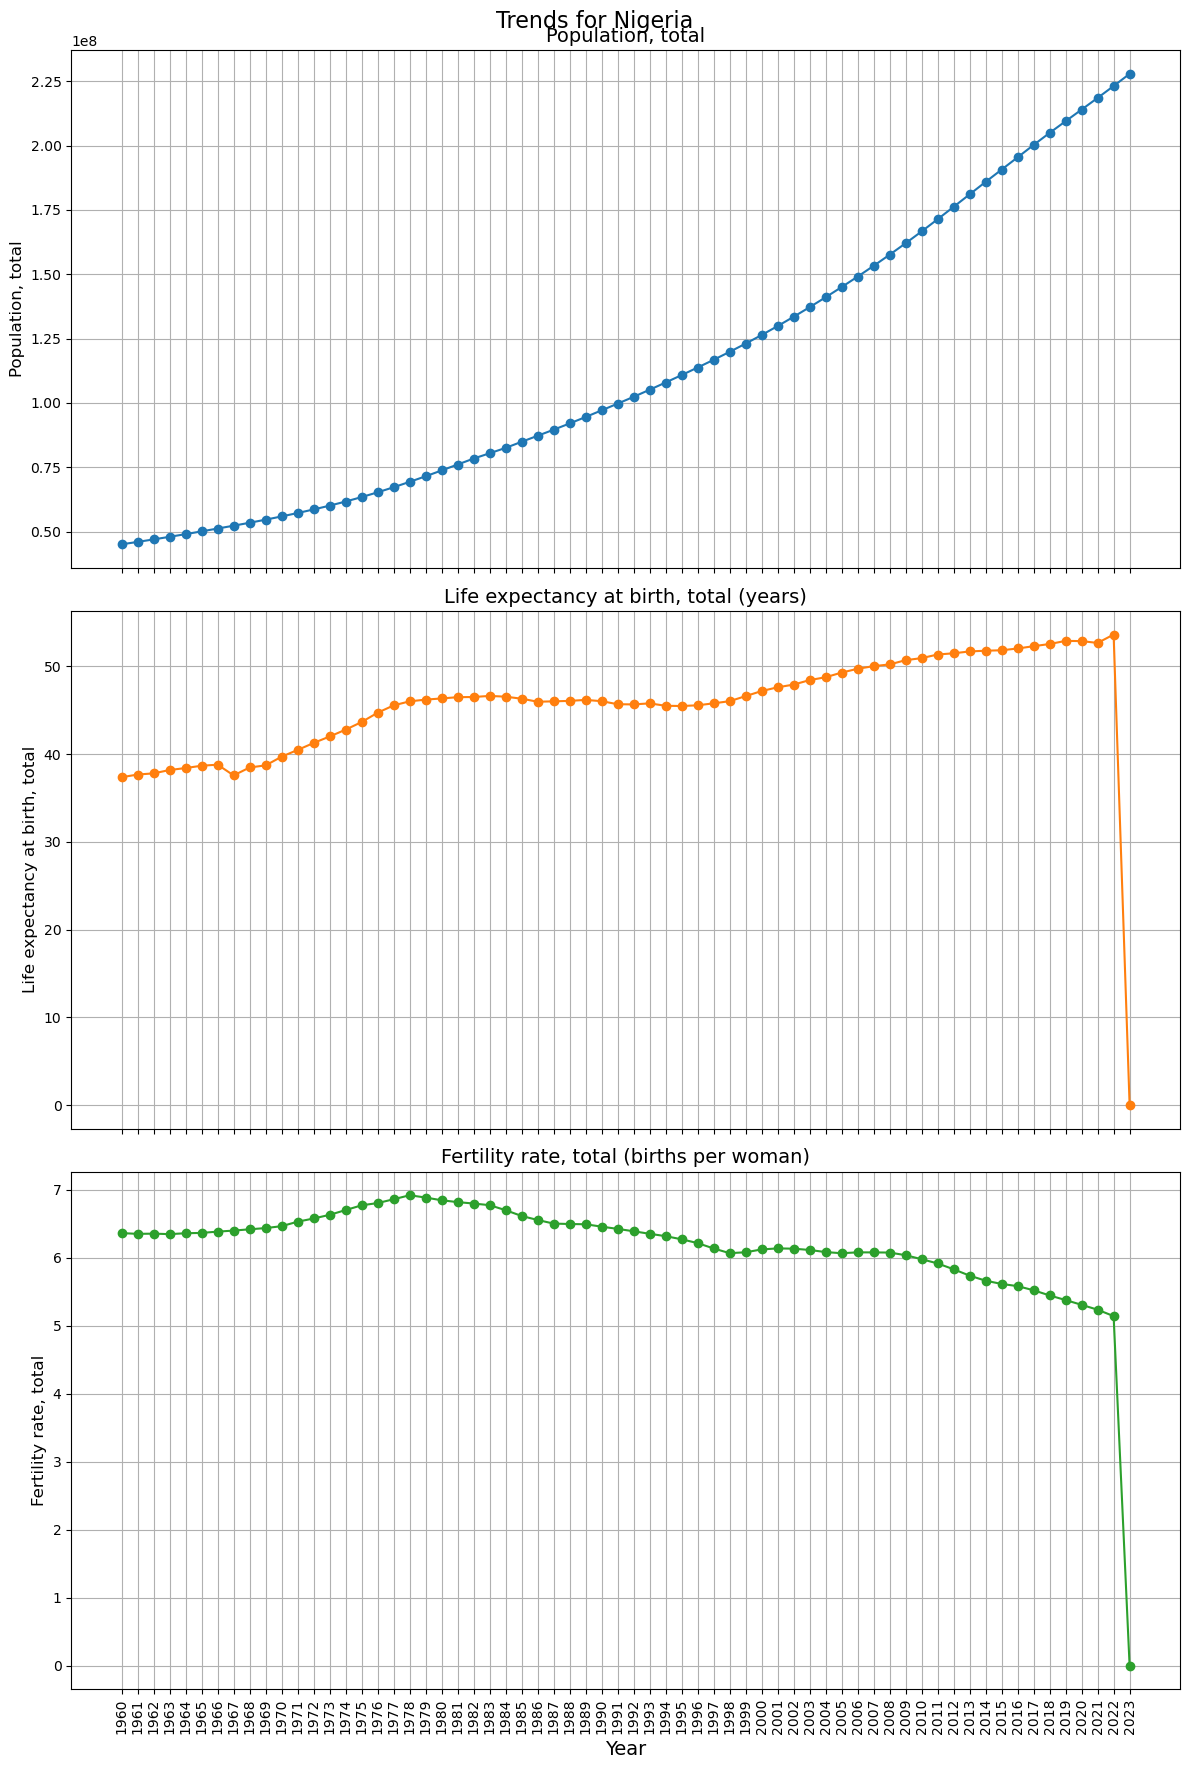

In [67]:
country = 'Nigeria'

nigeria_data = data[data['Country Name'] == country]
indicators = ['Population, total', 'Life expectancy at birth, total (years)', 'Fertility rate, total (births per woman)']
nigeria_data = nigeria_data[nigeria_data['Indicator Name'].isin(indicators)]

nigeria_data = nigeria_data.drop(columns=['Country Name', 'Country Code', 'Indicator Code'])

nigeria_data = nigeria_data.set_index('Indicator Name').transpose()

fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

for i, indicator in enumerate(indicators):
    axes[i].plot(nigeria_data.index, nigeria_data[indicator], marker='o', color=sns.color_palette('tab10')[i])
    axes[i].set_title(indicator, fontsize=14)
    axes[i].set_ylabel(indicator.split('(')[0].strip(), fontsize=12)
    axes[i].grid()

plt.suptitle(f"Trends for {country}", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Machine Learning Algorithm for Nigeria

* Preparing the Data for Machine Learning

In [68]:
country = 'Nigeria'
nigeria_data = data[data['Country Name'] == country]

indicators = ['Population, total', 'Life expectancy at birth, total (years)', 'Fertility rate, total (births per woman)']
nigeria_data = nigeria_data[nigeria_data['Indicator Name'].isin(indicators)]

nigeria_data = nigeria_data.drop(columns=['Country Name', 'Country Code', 'Indicator Code'])

nigeria_data = nigeria_data.set_index('Indicator Name').transpose()
nigeria_data = nigeria_data.reset_index().rename(columns={'index': 'Year'})

nigeria_data['Year'] = pd.to_numeric(nigeria_data['Year'])
nigeria_data = nigeria_data.dropna()
print(nigeria_data.head())

Indicator Name  Year  Population, total  \
0               1960         45053782.0   
1               1961         45989310.0   
2               1962         46965292.0   
3               1963         47973575.0   
4               1964         49012016.0   

Indicator Name  Fertility rate, total (births per woman)  \
0                                                  6.364   
1                                                  6.353   
2                                                  6.356   
3                                                  6.349   
4                                                  6.362   

Indicator Name  Life expectancy at birth, total (years)  
0                                                37.371  
1                                                37.673  
2                                                37.809  
3                                                38.192  
4                                                38.415  


* Feature Engineering

In [69]:
X = nigeria_data[['Year', 'Life expectancy at birth, total (years)', 'Fertility rate, total (births per woman)']]
y = nigeria_data['Population, total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Random Forest Regressor Model

In [70]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')

Random Forest - Mean Squared Error: 3517692035620.7495
Random Forest - R^2 Score: 0.9990671854155768


* XGBoost Regressor Model

In [71]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost - Mean Squared Error: {mse_xgb}')
print(f'XGBoost - R^2 Score: {r2_xgb}')

XGBoost - Mean Squared Error: 10725589330875.54
XGBoost - R^2 Score: 0.9971558095327668


* Actual vs predicted values for Random Forest Model

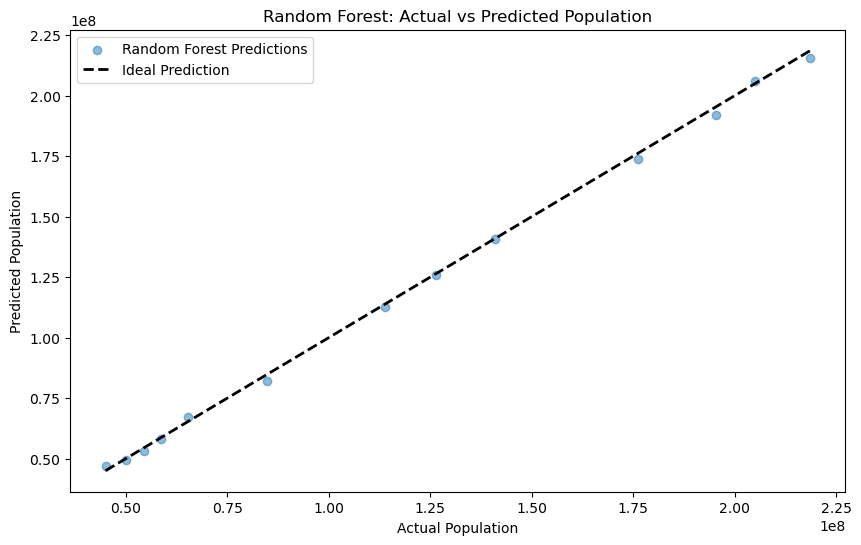

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Population')
plt.ylabel('Predicted Population')
plt.title('Random Forest: Actual vs Predicted Population')
plt.legend()
plt.show()

* Actual vs predicted values for XGBoost Regressor Model

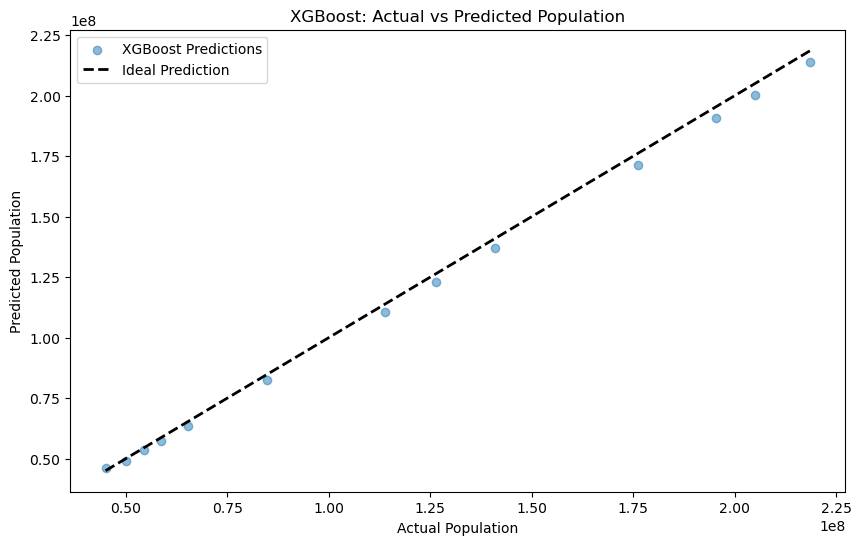

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Population')
plt.ylabel('Predicted Population')
plt.title('XGBoost: Actual vs Predicted Population')
plt.legend()
plt.show()

# Feature Importance

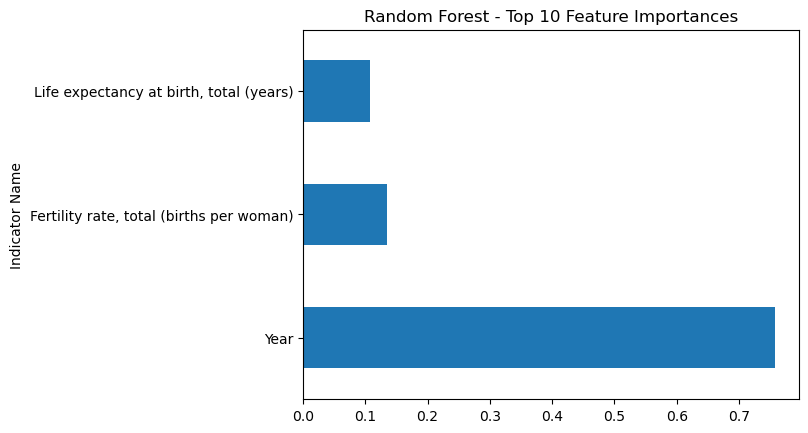

In [75]:
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances_rf.nlargest(10).plot(kind='barh')
plt.title('Random Forest - Top 10 Feature Importances')
plt.show()


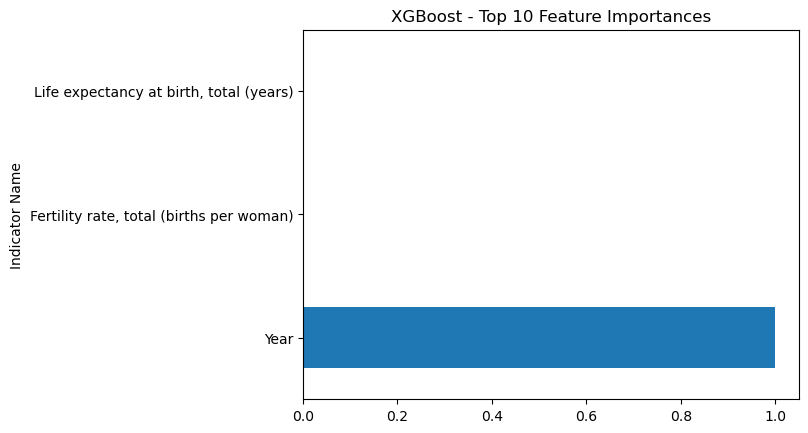

In [76]:
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importances_xgb.nlargest(10).plot(kind='barh')
plt.title('XGBoost - Top 10 Feature Importances')
plt.show()

# Machine Learning for subsaharan Africa

* Preparing the data

In [79]:
sub_saharan_countries = [
    'Nigeria', 'South Africa', 'Kenya', 'Ghana', 'Ethiopia', 'Tanzania', 'Uganda', 
    'Zambia', 'Zimbabwe', 'Senegal', 'Cote d\'Ivoire', 'Cameroon', 'Angola', 'Mali', 
    'Niger', 'Chad', 'Benin', 'Togo', 'Rwanda', 'Burundi', 'Malawi', 'Mozambique', 
    'Namibia', 'Botswana', 'Lesotho', 'Eswatini', 'Liberia', 'Sierra Leone', 'Gambia', 
    'Guinea', 'Guinea-Bissau', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Gabon', 'Equatorial Guinea'
]

sub_saharan_data = data[data['Country Name'].isin(sub_saharan_countries)]

indicators = [
    'Population, total', 
    'Life expectancy at birth, total (years)', 
    'Fertility rate, total (births per woman)', 
    'GDP per capita (current US$)', 
    'Mortality rate, infant (per 1,000 live births)', 
    'Prevalence of undernourishment (% of population)'
]

sub_saharan_data = sub_saharan_data[sub_saharan_data['Indicator Name'].isin(indicators)]

sub_saharan_data = sub_saharan_data.drop(columns=['Country Code', 'Indicator Code'])

sub_saharan_data = sub_saharan_data.melt(id_vars=['Country Name', 'Indicator Name'], var_name='Year', value_name='Value')
sub_saharan_data = sub_saharan_data.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='Value').reset_index()

sub_saharan_data = sub_saharan_data.dropna()

sub_saharan_data.head()

Indicator Name,Country Name,Year,"Fertility rate, total (births per woman)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)","Population, total",Prevalence of undernourishment (% of population)
0,Angola,1960,6.708,38.211,0.0,5231654.0,0.0
1,Angola,1961,6.790,37.267,0.0,5301583.0,0.0
2,Angola,1962,6.872,37.539,0.0,5354310.0,0.0
3,Angola,1963,6.954,37.824,0.0,5408320.0,0.0
4,Angola,1964,7.036,38.131,0.0,5464187.0,0.0


* Defining the features and target

In [80]:
X = sub_saharan_data.drop(columns=['Country Name', 'Year', 'Life expectancy at birth, total (years)'])
y = sub_saharan_data['Life expectancy at birth, total (years)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Random Forest Regressor Model

In [81]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R^2 Score: {r2_rf}")

Random Forest - Mean Squared Error: 3.798514091554585
Random Forest - R^2 Score: 0.9642682900246962


*  XGBoost Regressor Model

In [82]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R^2 Score: {r2_xgb}")

XGBoost - Mean Squared Error: 4.848798322193051
XGBoost - R^2 Score: 0.954388518457112


## Visualizing the result

* Actual vs predicted values for Random Forest

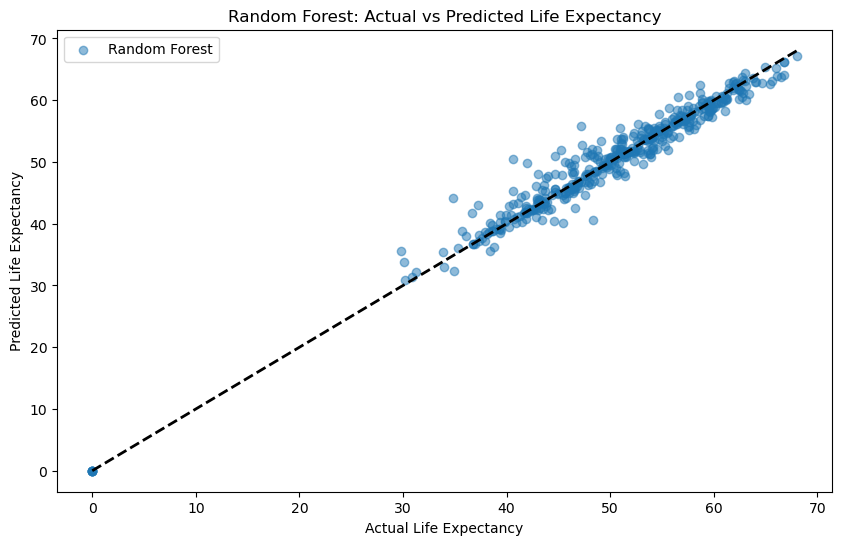

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Random Forest: Actual vs Predicted Life Expectancy')
plt.legend()
plt.show()

* Actual vs predicted values for XGBoost

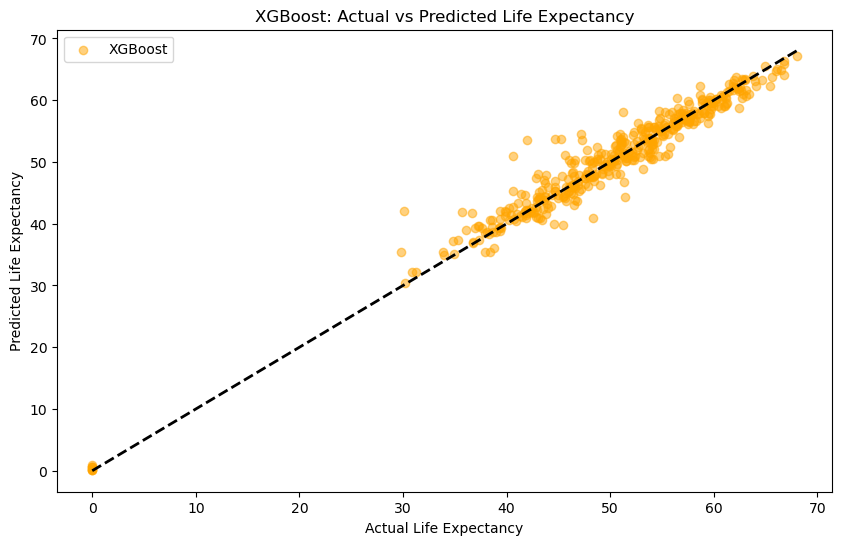

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('XGBoost: Actual vs Predicted Life Expectancy')
plt.legend()
plt.show()

### Feature Importance for:
* Random Forest
* XGBoost

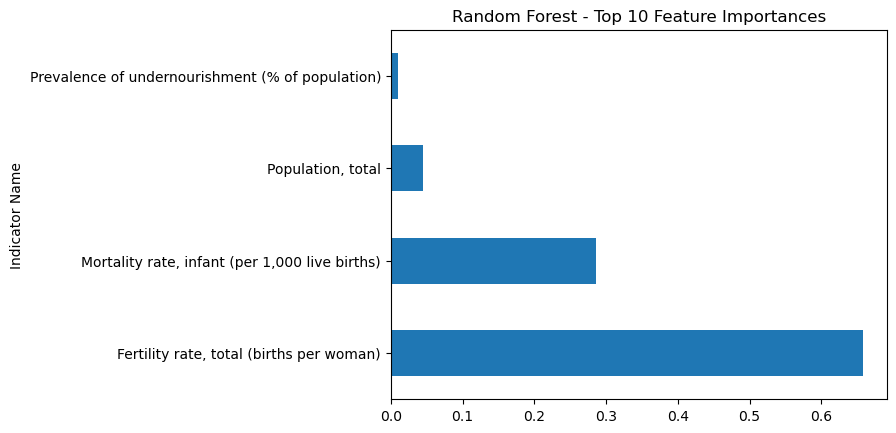

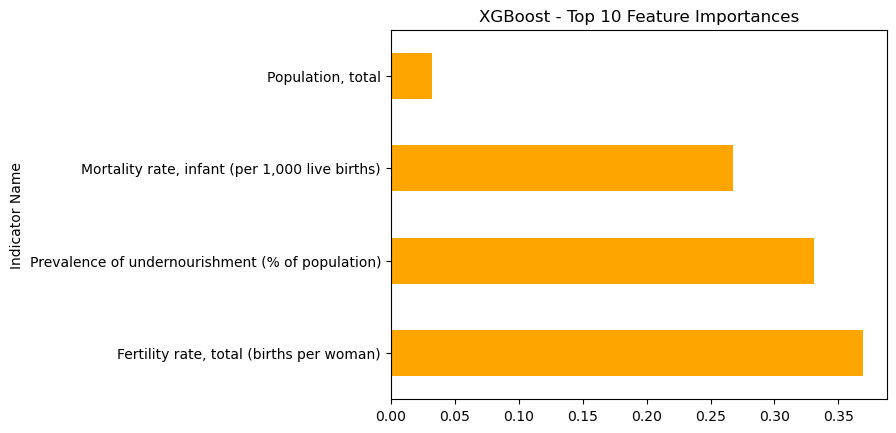

In [86]:
# Random Forest
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances_rf.nlargest(10).plot(kind='barh', title='Random Forest - Top 10 Feature Importances')
plt.show()

# XGBoost
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importances_xgb.nlargest(10).plot(kind='barh', title='XGBoost - Top 10 Feature Importances', color='orange')
plt.show()

* Saving the models

In [88]:
# Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [89]:
# XGBoost model
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']

# Machine learning agorithm for all countries
* Target: Population

In [96]:
target_indicator = 'Population, total'
target_data = data[data['Indicator Name'] == target_indicator]

target_data = target_data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
target_data = target_data.set_index('Country Name')

target_data = target_data.transpose()

target_data = target_data.reset_index().rename(columns={'index': 'Year'})

target_data['Year'] = pd.to_numeric(target_data['Year'])

target_data = target_data.dropna()

target_data.head()

Country Name,Year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1960,54922.0,130072080.0,9035043.0,97630925.0,5231654.0,1608800.0,9510.0,91540853.0,131334.0,...,32500.0,32531933.0,64431.0,3.021529e+09,112490.0,984846.0,5532301.0,16440172.0,3153729.0,3809389.0
1,1961,55578.0,133534923.0,9214083.0,99706674.0,5301583.0,1659800.0,10283.0,93931683.0,137989.0,...,34300.0,33409059.0,66264.0,3.062769e+09,115496.0,1011421.0,5655232.0,16908035.0,3254086.0,3930401.0
2,1962,56320.0,137171659.0,9404406.0,101854756.0,5354310.0,1711319.0,11086.0,96428599.0,144946.0,...,35000.0,34288560.0,68174.0,3.117373e+09,118597.0,1036950.0,5782221.0,17418522.0,3358099.0,4055959.0
3,1963,57002.0,140945536.0,9604487.0,104089175.0,5408320.0,1762621.0,11915.0,99038509.0,152211.0,...,39800.0,35249101.0,70159.0,3.184063e+09,121764.0,1062737.0,5911135.0,17954564.0,3465907.0,4185877.0
4,1964,57619.0,144904094.0,9814318.0,106388440.0,5464187.0,1814135.0,12764.0,101729760.0,159692.0,...,40800.0,36201563.0,72219.0,3.251253e+09,124894.0,1090270.0,6048006.0,18511361.0,3577017.0,4320006.0


* Features and Target

In [97]:
X = target_data[['Year']] 
y = target_data.drop(columns=['Year'])  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Random Forest Regressor

In [98]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

models = {}
for country in y.columns:
    print(f"Training model for {country}...")
    model.fit(X_train, y_train[country])
    models[country] = model

for country, model in models.items():
    joblib.dump(model, f'model_{country}.pkl')

Training model for Aruba...
Training model for Africa Eastern and Southern...
Training model for Afghanistan...
Training model for Africa Western and Central...
Training model for Angola...
Training model for Albania...
Training model for Andorra...
Training model for Arab World...
Training model for United Arab Emirates...
Training model for Argentina...
Training model for Armenia...
Training model for American Samoa...
Training model for Antigua and Barbuda...
Training model for Australia...
Training model for Austria...
Training model for Azerbaijan...
Training model for Burundi...
Training model for Belgium...
Training model for Benin...
Training model for Burkina Faso...
Training model for Bangladesh...
Training model for Bulgaria...
Training model for Bahrain...
Training model for Bahamas, The...
Training model for Bosnia and Herzegovina...
Training model for Belarus...
Training model for Belize...
Training model for Bermuda...
Training model for Bolivia...
Training model for Bra

* Evaluating the model

In [99]:
results = {}
for country in y.columns:
    y_pred = models[country].predict(X_test)
    mse = mean_squared_error(y_test[country], y_pred)
    r2 = r2_score(y_test[country], y_pred)
    results[country] = {'MSE': mse, 'R2': r2}
    print(f"Results for {country}: MSE = {mse}, R² = {r2}")

results_df = pd.DataFrame(results).transpose()
print(results_df)

Results for Aruba: MSE = 112997102442122.39, R² = -237638.4734715092
Results for Africa Eastern and Southern: MSE = 1.7260049458543824e+17, R² = -3.2460263123868973
Results for Afghanistan: MSE = 167558861245030.38, R² = -0.44603425780300676
Results for Africa Western and Central: MSE = 7.930492014024946e+16, R² = -3.2724464641390103
Results for Angola: MSE = 79837984618339.53, R² = 0.2538580196671554
Results for Albania: MSE = 67024045502022.33, R² = -280.39383028134637
Results for Andorra: MSE = 113569680665531.44, R² = -167322.53689129624
Results for Arab World: MSE = 7.703539785645848e+16, R² = -3.4797216586414246
Results for United Arab Emirates: MSE = 39359456894161.87, R² = -1.9699653058640316
Results for Argentina: MSE = 579285797910344.1, R² = -6.2744475809410005
Results for Armenia: MSE = 64662892840868.68, R² = -359.3423306051804
Results for American Samoa: MSE = 113836437101324.94, R² = -622538.7455504496
Results for Antigua and Barbuda: MSE = 113215084645984.42, R² = -7307

* Visualizing a few countries

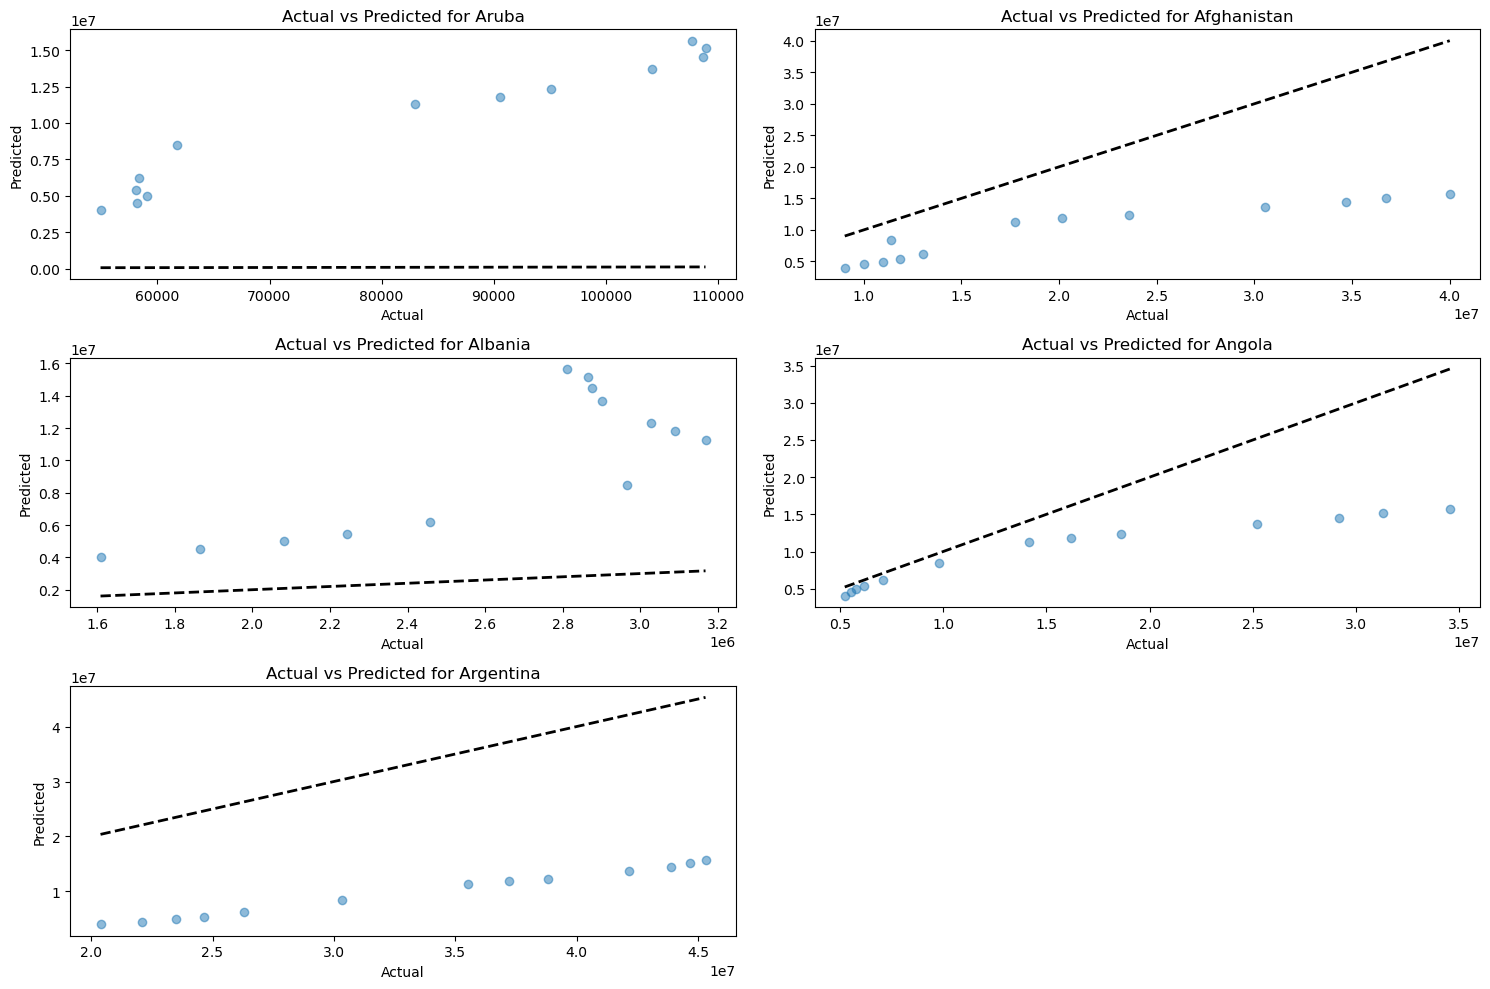

In [100]:
countries_to_plot = ['Aruba', 'Afghanistan', 'Albania', 'Angola', 'Argentina']

plt.figure(figsize=(15, 10))
for i, country in enumerate(countries_to_plot, 1):
    plt.subplot(3, 2, i)
    y_pred = models[country].predict(X_test)
    plt.scatter(y_test[country], y_pred, alpha=0.5)
    plt.plot([y_test[country].min(), y_test[country].max()], [y_test[country].min(), y_test[country].max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {country}')

plt.tight_layout()
plt.show()

* Looking at Sub-saharan African countries 

In [101]:
sub_saharan_countries = [
    'Nigeria', 'South Africa', 'Kenya', 'Ghana', 'Ethiopia', 'Tanzania', 
    'Uganda', 'Zambia', 'Zimbabwe', 'Senegal', 'Cote d\'Ivoire', 'Cameroon'
]

* Plot actual vs predicted values for Sub-Saharan African countries

In [ ]:
plt.figure(figsize=(15, 10))
for i, country in enumerate(sub_saharan_countries, 1):
    plt.subplot(4, 3, i)
    y_pred = models[country].predict(X_test)
    plt.scatter(y_test[country], y_pred, alpha=0.5)
    plt.plot([y_test[country].min(), y_test[country].max()], [y_test[country].min(), y_test[country].max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {country}')

plt.tight_layout()
plt.show()